In [1]:
import matplotlib.pyplot as plt
import torch 
import numpy as np 
import seaborn as sns
import pandas as pd

In [2]:
n = 128 
t = torch.linspace(0, 1, n, requires_grad=True).view(-1, 1).double()
dts = []
for i in range(5,9,1):
    name = "plot_N_"+str(i)+".txt"
    X = np.loadtxt(name)
    design_points = []
    for episode in range(X.shape[0]//128):
        Z = np.diff(X[episode*128:(episode+1)*128,1])
        mask = Z == 1
        if X[episode*128:(episode+1)*128,1][0] == 1:
            mask[0] = True
        #print (t.detach()[1:128].view(-1)[mask])
        design_points.append(t.detach()[1:128][mask])
    dt = pd.DataFrame(torch.cat(design_points).view(-1).numpy())
    dt.columns = ['location']
    dt['budget'] = i-1
    dts.append(dt)
    #plt.hist (torch.cat(design_points).view(-1).numpy())
    #plt.show()
df = pd.concat(dts)
print (df)

     location  budget
0    0.204724       4
1    0.251969       4
2    0.299213       4
3    0.637795       4
4    0.039370       4
..        ...     ...
443  0.259843       7
444  0.385827       7
445  0.464567       7
446  0.826772       7
447  0.992126       7

[1408 rows x 2 columns]


AttributeError: 'PolyCollection' object has no property 'fontsize'

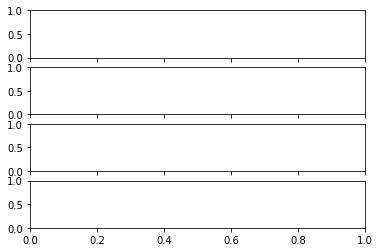

In [6]:
from joypy import joyplot

fig, axes = joyplot(df, by = 'budget', column = 'location', fontsize =14, color = 'tab:blue', fade = True, alpha = 0.1)
ax = axes[-1]

plt.xlabel("time [days]", fontsize = 14)
plt.ylabel("No. measurements", fontsize = 14)
ax.set_ylabel("No. measurements", fontsize = 14)
ax.yticks(fontsize= 14)
ax.yaxis.set_visible(True)
ax.yaxis.set_ticks([])
ax.yaxis.set_label_position("right")
for dt,b in zip(dts,range(5,11,1)):
    print(dt.iloc[0:b-1,0])
    axes[b-5].plot(dt.iloc[0:b-1,0],dt.iloc[0:b-1,0]*0,'yo', ms = 7, zorder = 100)
plt.savefig("pharmaco-concentration.png",dpi = 100, bbox_inches = 'tight',pad_inches = 0)
plt.show()